In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.cnn import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from cs231n.layers import *
from cs231n.fast_layers import *
from cs231n.solver import CupySolver
import os

In [2]:
# Load the (preprocessed) CIFAR-10 data.
data = get_CIFAR10_data()
for k, v in list(data.items()):
    print(f"{k}: {v.shape}")
  
solver = CupySolver()

X_train: (49000, 3, 32, 32)
y_train: (49000,)
X_val: (1000, 3, 32, 32)
y_val: (1000,)
X_test: (1000, 3, 32, 32)
y_test: (1000,)


In [19]:
output_dir = './output'
checkpoint_dir = []
checkpoint_dir.append(os.path.join(output_dir, 'baseline'))
checkpoint_dir.append(os.path.join(output_dir, 'arch_3conv_2fc'))
checkpoint_dir.append(os.path.join(output_dir, 'arch_2conv_3fc'))
checkpoint_dir.append(os.path.join(output_dir, 'filters_wider'))
checkpoint_dir.append(os.path.join(output_dir, 'fc_neurons_more'))
checkpoint_dir.append(os.path.join(output_dir, 'fc_neurons_less'))
checkpoint_dir.append(os.path.join(output_dir, 'kernel_3x3'))
checkpoint_dir.append(os.path.join(output_dir, 'kernel_7x7'))

sovlers = []
for checkpoint in checkpoint_dir:
    solver = CupySolver()
    solver.from_pretrained(os.path.join(checkpoint, 'checkpoint_epoch_10.pkl'))
    sovlers.append(solver)


In [35]:
def cal_accuracy(index, labels, mode='train'):
    for idx,label in zip(index, labels):
        if mode == 'train':
            print(f'{label} train accuracy: {sovlers[idx].check_accuracy(data["X_train"], data["y_train"])}')
        elif mode == 'val':
            print(f'{label} val accuracy: {sovlers[idx].check_accuracy(data["X_val"], data["y_val"])}')
        elif mode == 'test':
            print(f'{label} test accuracy: {sovlers[idx].check_accuracy(data["X_test"], data["y_test"])}')
        else:
            raise ValueError(f'Invalid mode: {mode}')

def draw_loss_and_accuracy(index, labels, window_size=50):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5), dpi=250)
    window_size = 50
    for idx,label in zip(index, labels):
        loss_history = np.array(sovlers[idx].loss_history)
        loss_moving_average = np.convolve(loss_history, np.ones((window_size,))/window_size, mode='valid')
        axs[0].plot(loss_moving_average, '-.', label=f'{label}')

    axs[0].set_xlabel('iteration')
    axs[0].set_ylabel('loss')
    axs[0].legend()
    axs[0].set_title('train loss')

    for idx,label in zip(index, labels):
        axs[1].plot(sovlers[idx].train_acc_history, '-o', label=f'{label}')

    axs[1].set_xlabel('epoch')
    axs[1].set_ylabel('accuracy')
    axs[1].legend()
    axs[1].set_title('train accuracy')

    plt.show()

## Compare the depth of the network

- `baseline`: 2 conv layers (16, 32), 2 fc layers (300, 100)
- `arch_3conv_2fc`: 3 conv layers (16, 16, 32), 2 fc layers (300, 100)
- `arch_2conv_3fc`: 2 conv layers (16, 32), 3 fc layers (300, 200, 100)

16x32_300x100 test accuracy: 0.636
16x16x32_300x100 test accuracy: 0.613
16x32_300x200x100 test accuracy: 0.6


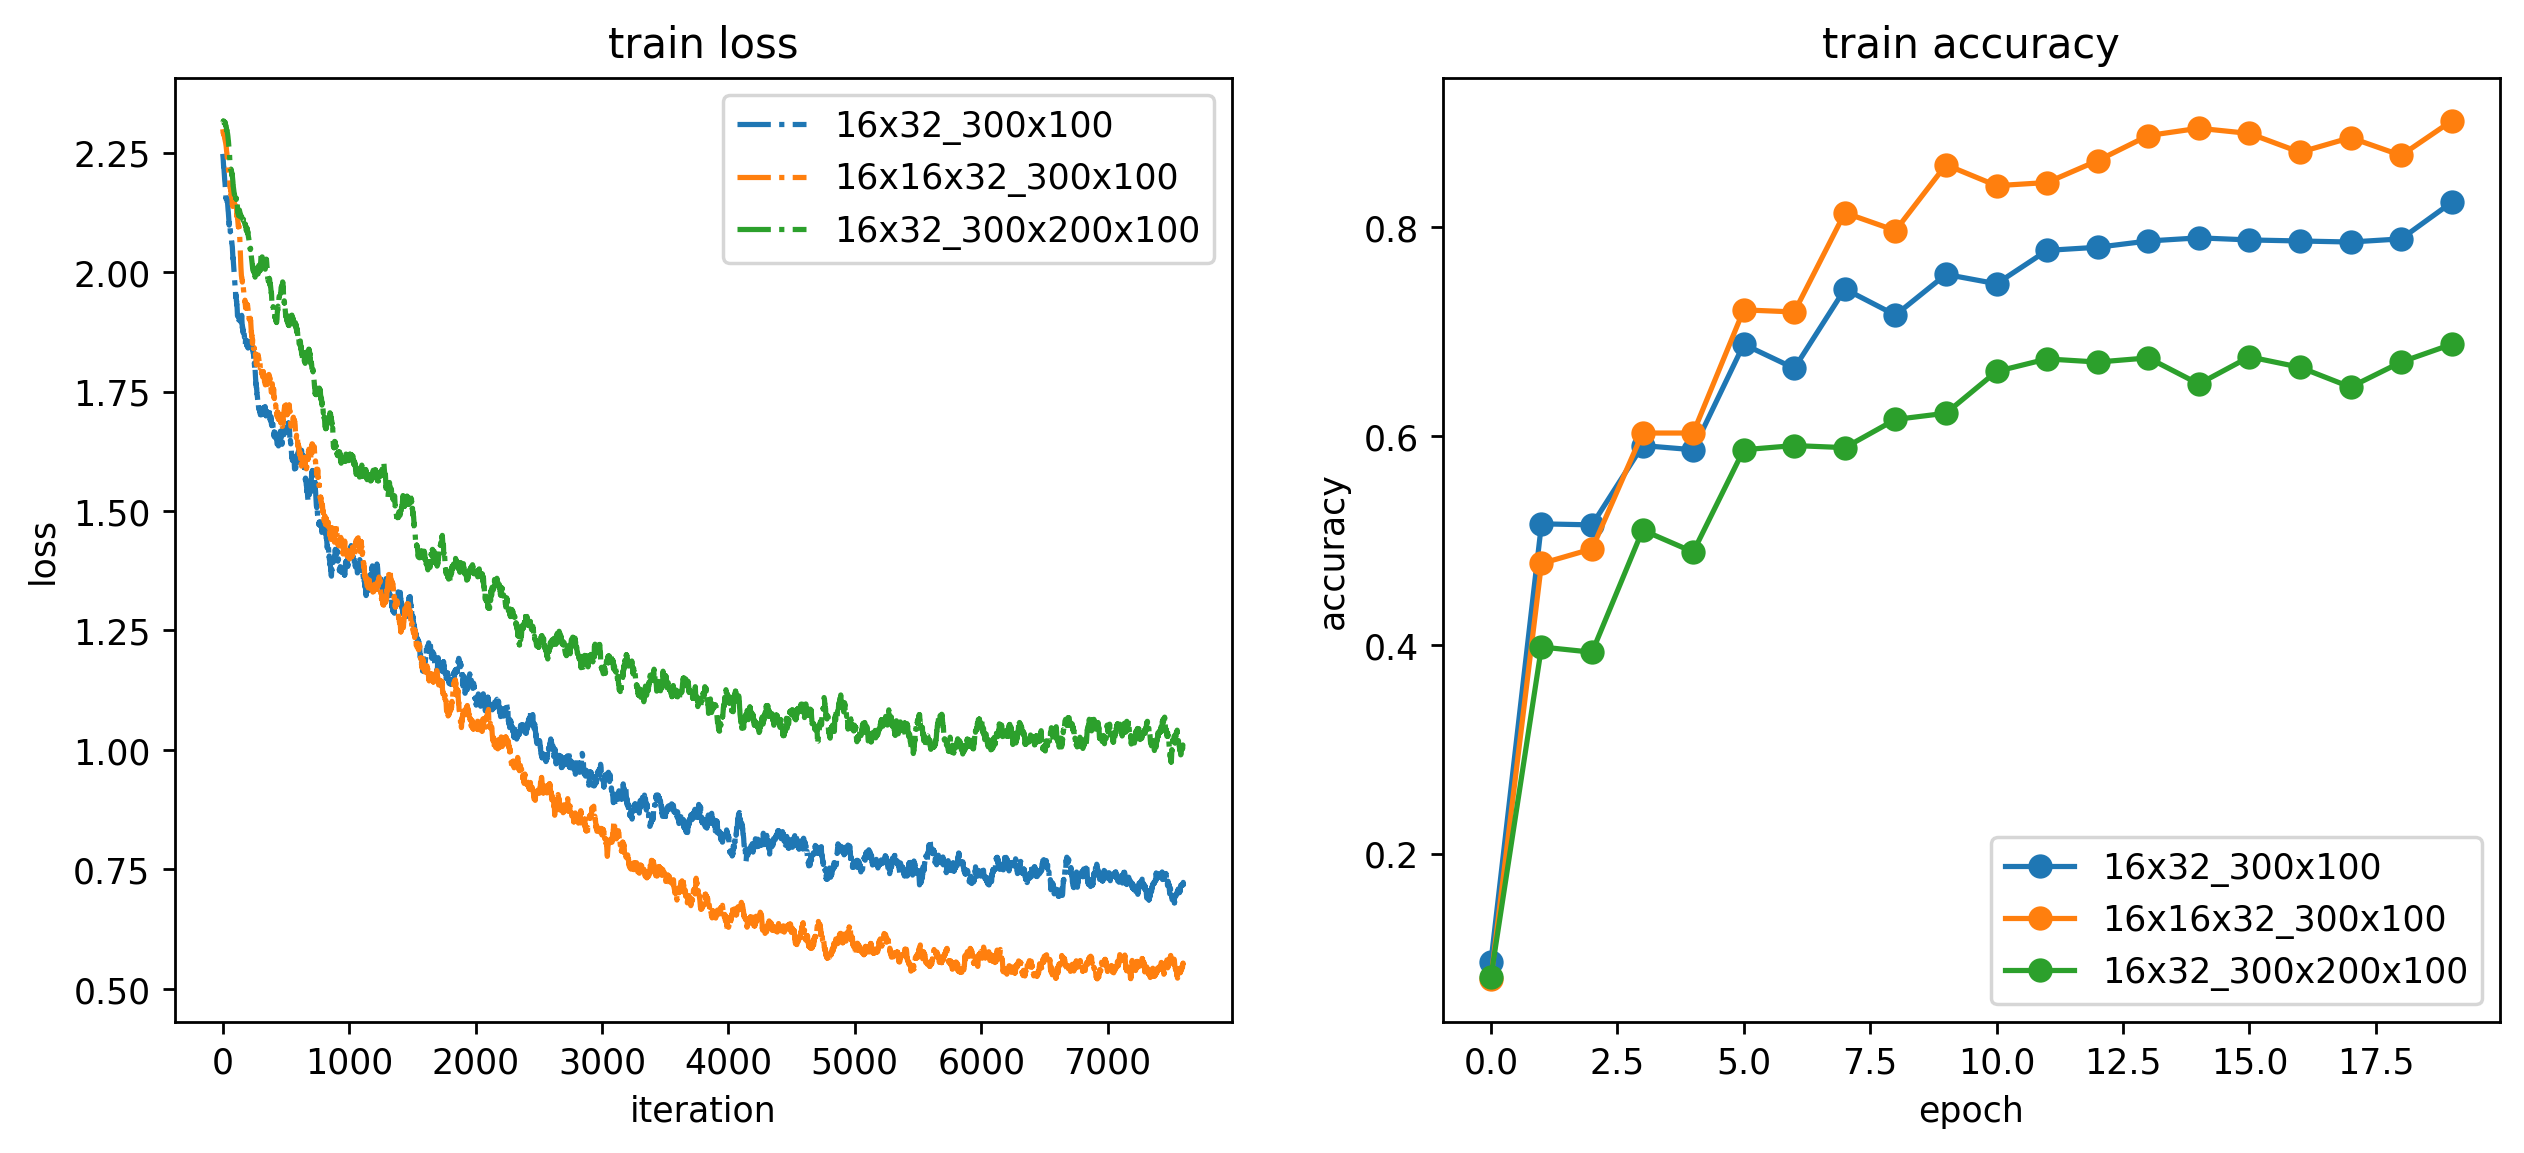

In [ ]:
index =[0,1,2]
labels = ['16x32_300x100', '16x16x32_300x100', '16x32_300x200x100']
cal_accuracy(index, labels, mode='test')
draw_loss_and_accuracy(index, labels)

## Compare the width of the network

- `baseline`: 2 conv layers (16, 32), 2 fc layers (300, 100)
- `cov_wider`: 2 conv layers (32, 64), 2 fc layers (300, 100)
- `fc_wider`: 2 conv layers (16, 32), 2 fc layers (600, 100)
- `fc_narrower`: 2 conv layers (16, 32), 2 fc layers (150, 50)

16x32_300x100 test accuracy: 0.636
32x64_300x100 test accuracy: 0.64
16x32_600x100 test accuracy: 0.616
16x32_150x50 test accuracy: 0.622


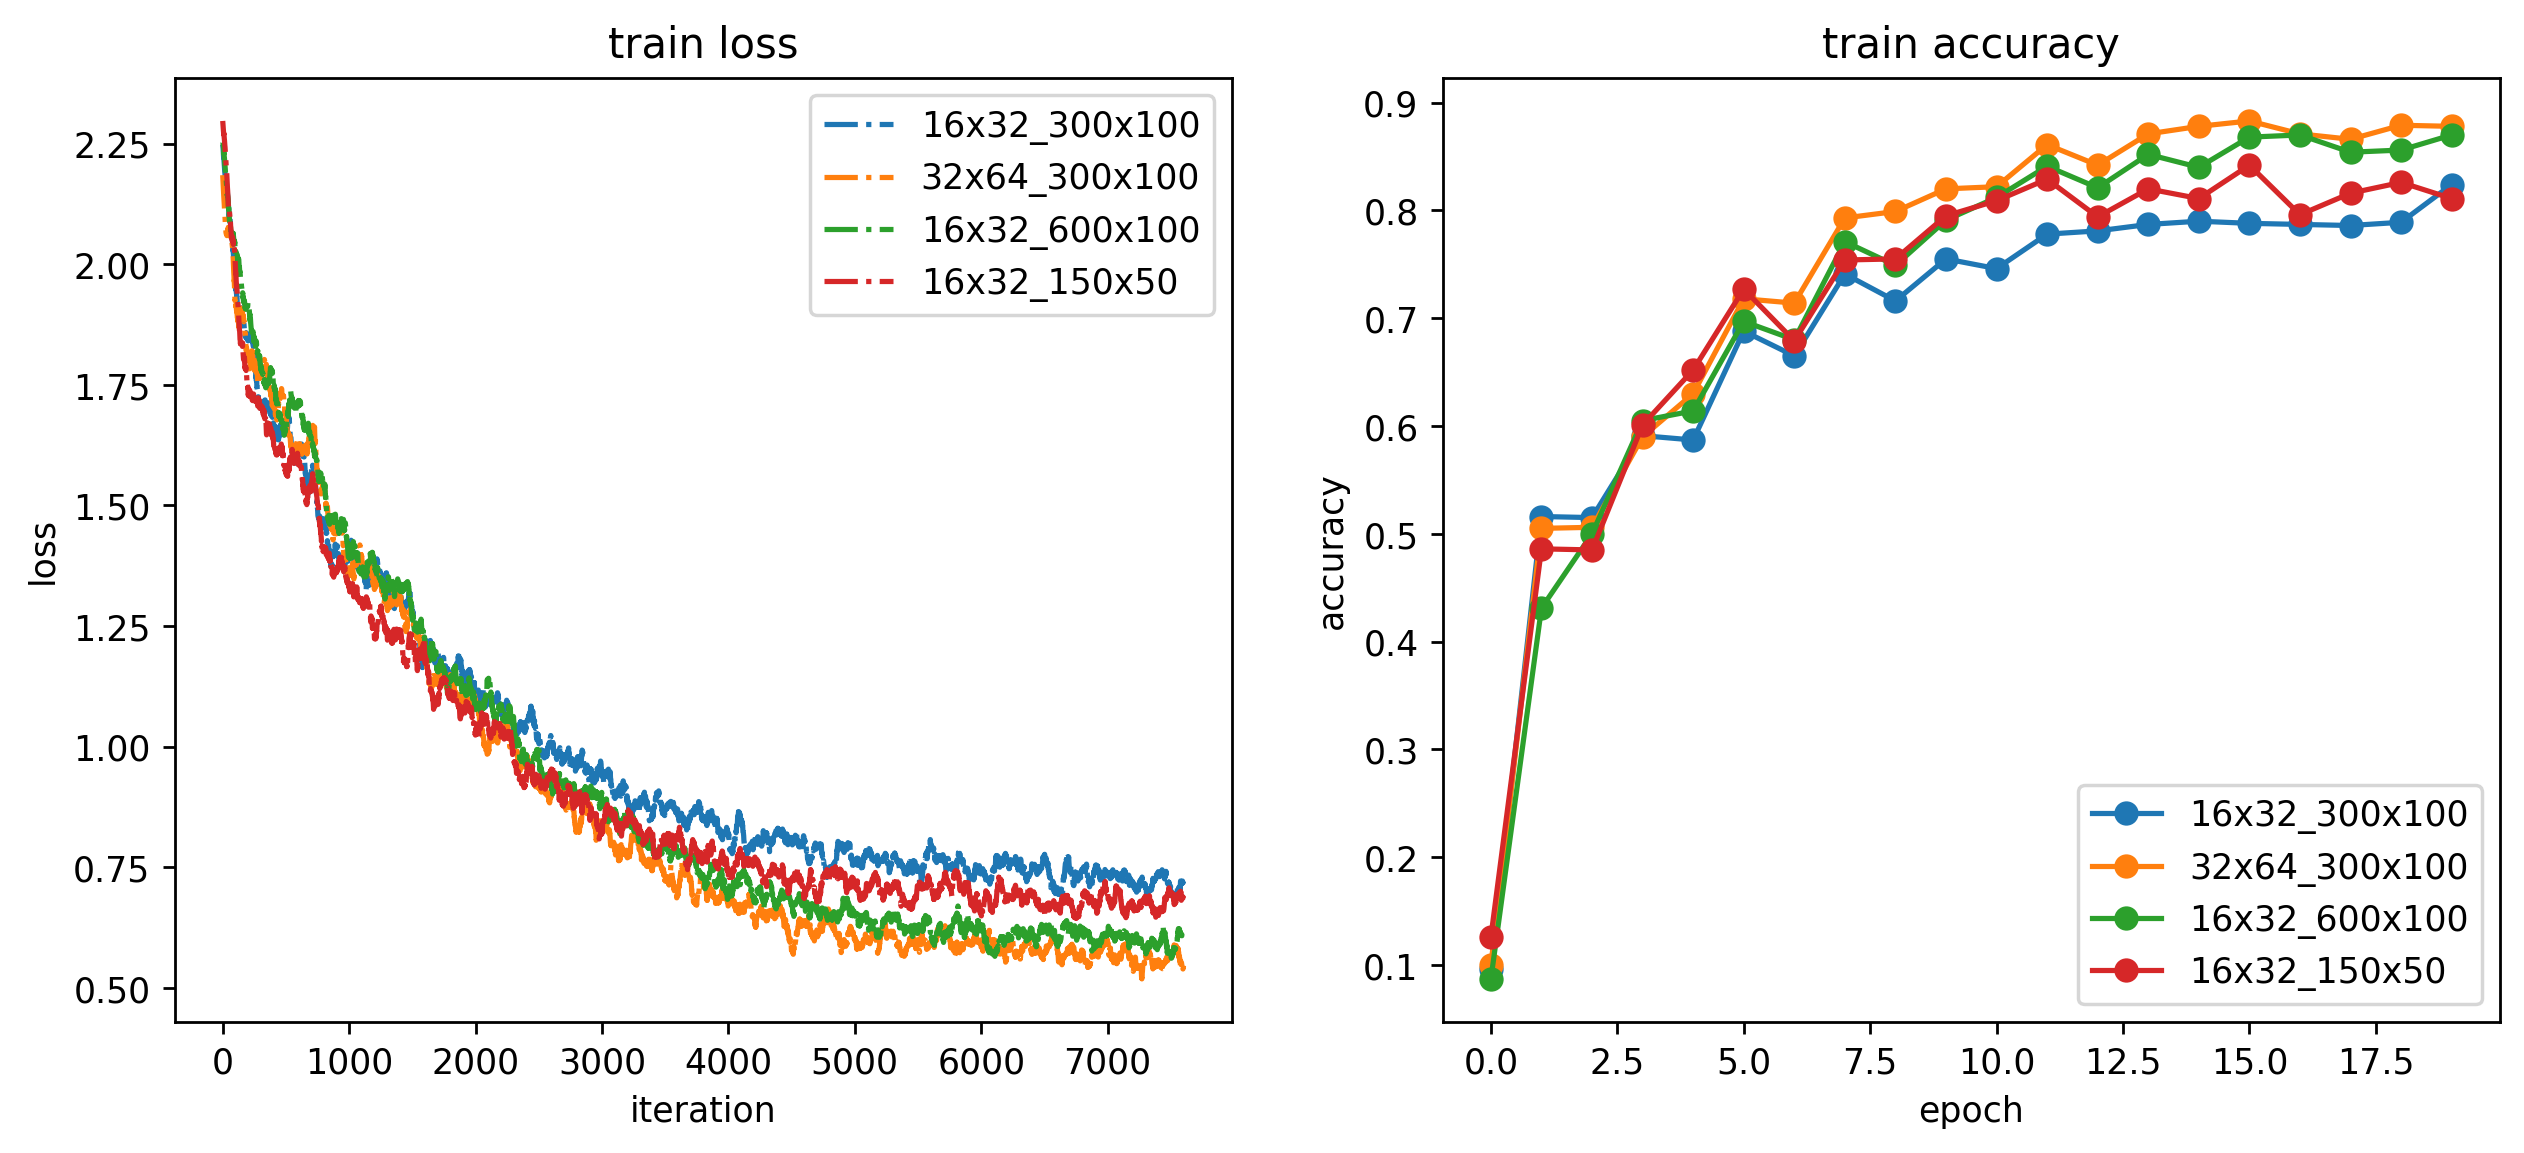

In [38]:
index =[0,3,4,5]
labels = ['16x32_300x100', '32x64_300x100', '16x32_600x100', '16x32_150x50']

cal_accuracy(index, labels, mode='test')
draw_loss_and_accuracy(index, labels)

## Compare the kernel size

- `baseline`: 2 conv layers (16, 32), kernel size 5x5
- `kernel_3x3`: 2 conv layers (16, 32), kernel size 3x3
- `kernel_7x7`: 2 conv layers (16, 32), kernel size 7x7


kernel_5x5 test accuracy: 0.636
kernel_3x3 test accuracy: 0.589
kernel_7x7 test accuracy: 0.573


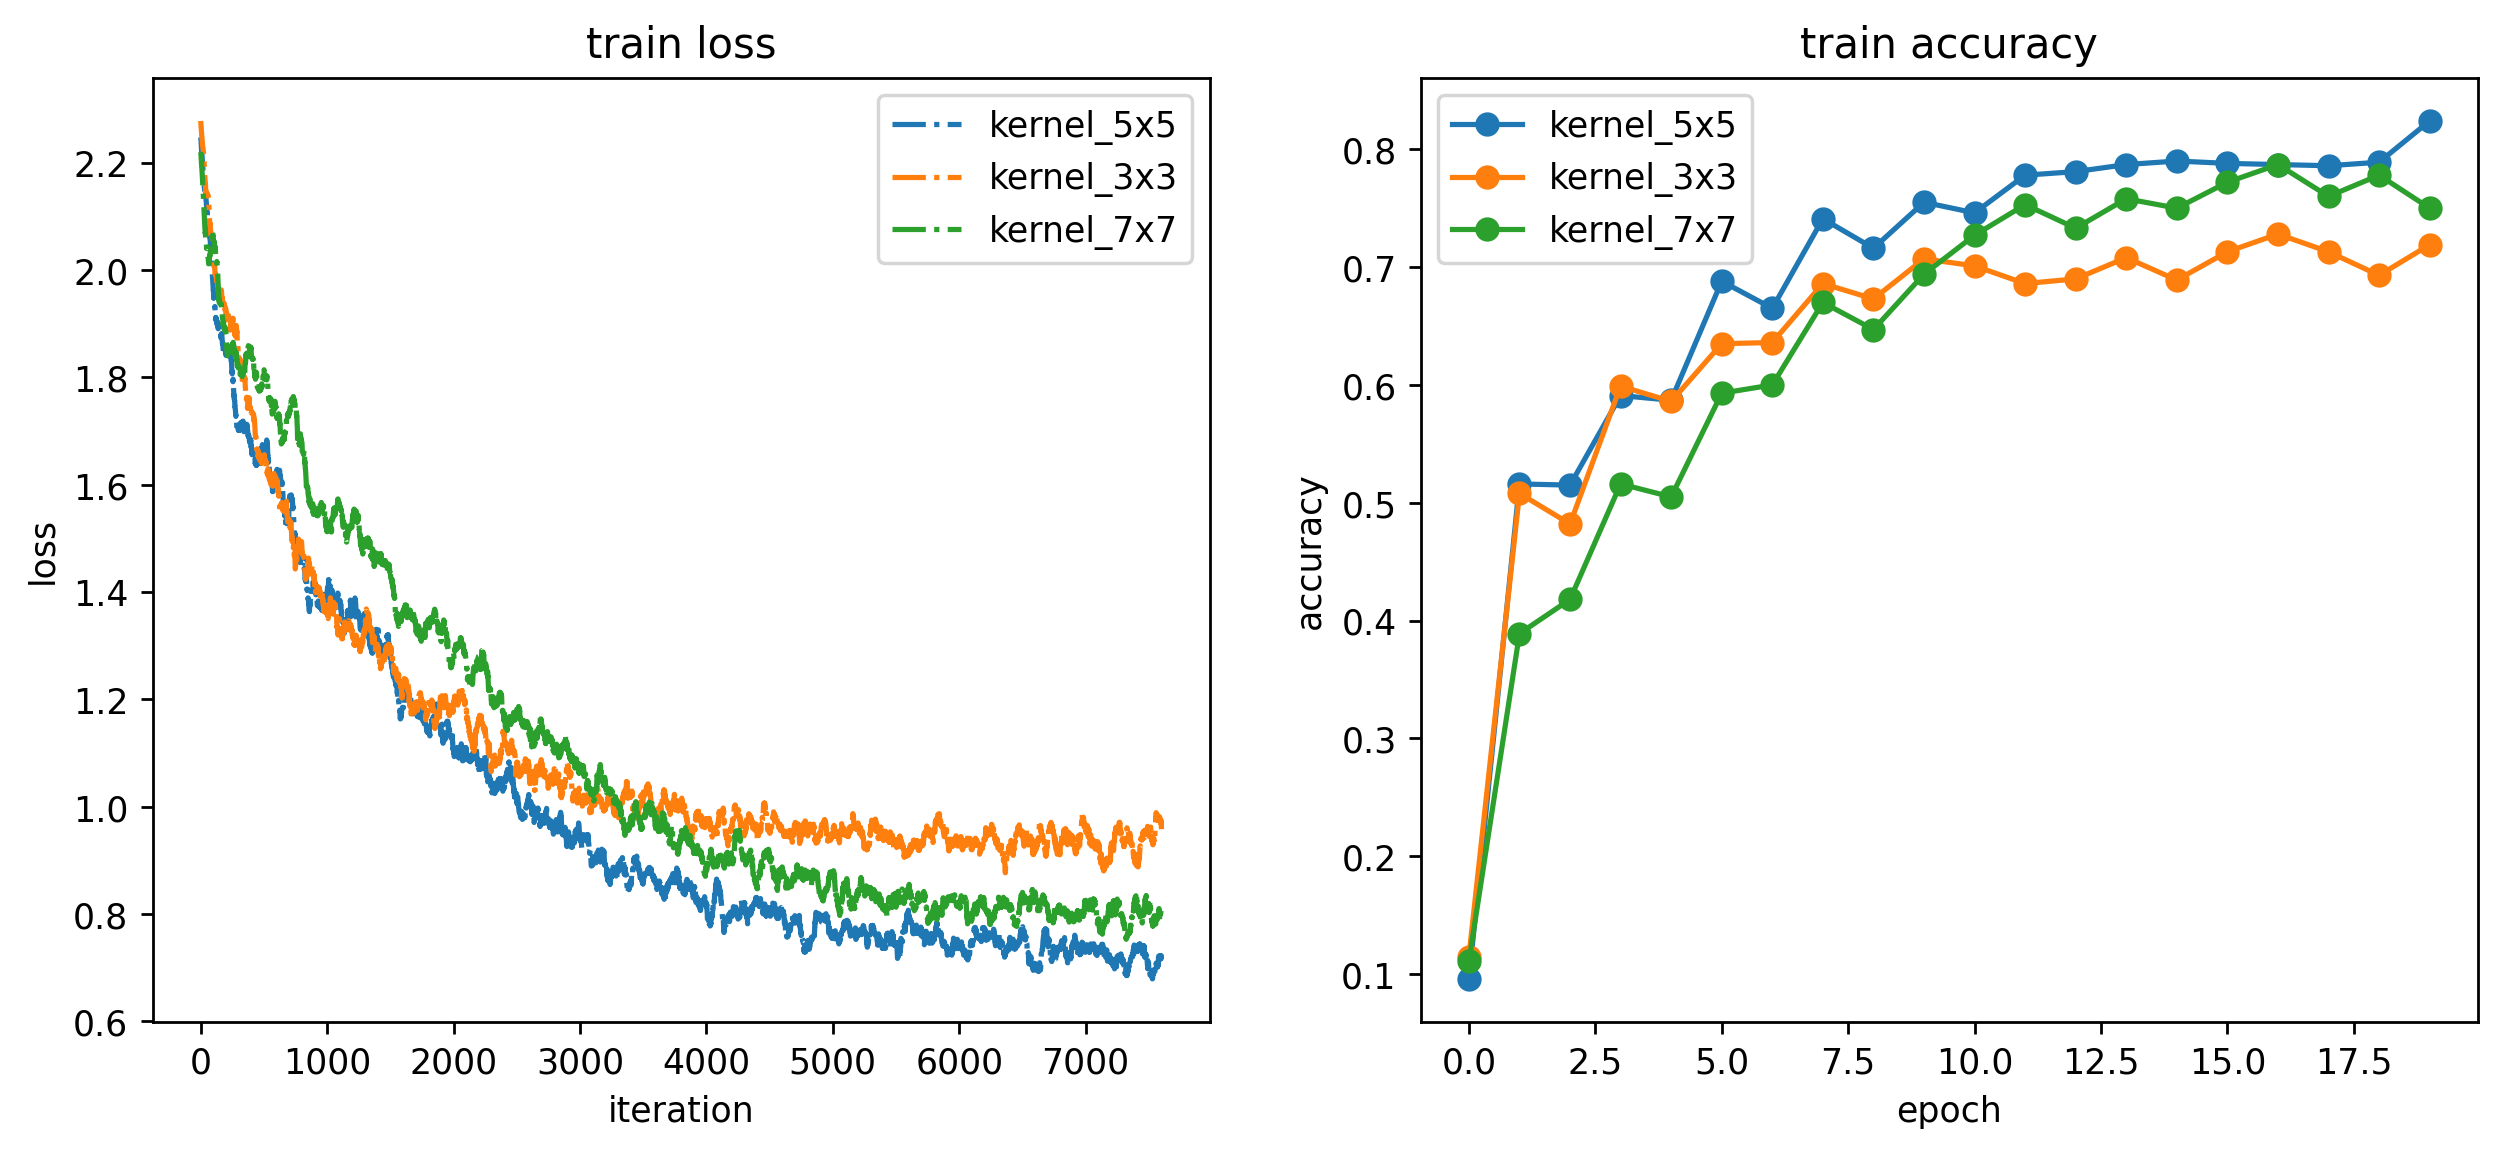

In [39]:
index =[0,6,7]
labels = ['kernel_5x5', 'kernel_3x3', 'kernel_7x7']
cal_accuracy(index, labels, mode='test')
draw_loss_and_accuracy(index, labels)